In [13]:
# http://stackoverflow.com/questions/25126444/logistic-regression-in-pymc
# http://nbviewer.jupyter.org/gist/aflaxman/8329ec1b9f861469f896



In [14]:
import pymc as pm, pandas as pd, seaborn
%matplotlib inline


In [15]:
import io

df = pd.read_csv(io.StringIO("""ID,GotSick,Salad,Sandwich,Water
1,0,0,1,0
2,1,1,0,1
3,0,1,0,0
100,1,1,0,1"""))

In [16]:
x1 = df.Salad
x2 = df.Sandwich
x3 = df.Water

### hyperpriors
tau = pm.Gamma('tau', 1.e-3, 1.e-3, value=10.)
sigma = pm.Lambda('sigma', lambda tau=tau: tau**-.5)

### parameters
# fixed effects
beta0 =  pm.Normal('beta0',  0., 1e-6, value=0.)
betaSalad =  pm.Normal('betaSalad',  0., 1e-6, value=0.) 
betaSandwich =  pm.Normal('betaSandwich',  0., 1e-6, value=0.)
betaWater = pm.Normal('betaWater',  0., 1e-6, value=0.)

# expected parameter
logit_p =  (beta0 + betaSalad*x1 + betaSandwich*x2 + betaWater*x3)

In [17]:
import pymc as pm

@pm.observed
def y(logit_p=logit_p, value=df.GotSick):
    return pm.bernoulli_like(df.GotSick, pm.invlogit(logit_p))

In [25]:
m = pm.MCMC((beta0, betaSandwich, betaSalad, betaWater, logit_p))
m.sample(50000, 5000, burn_till_tuned=True, thin=40)


 [-------------------111%-------------------] 55700 of 50000 complete in 69.1 sec

Plotting betaSandwich
Plotting beta0
Plotting betaWater
Plotting betaSalad


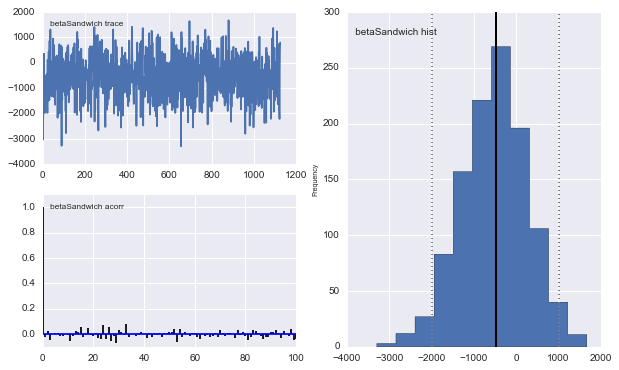

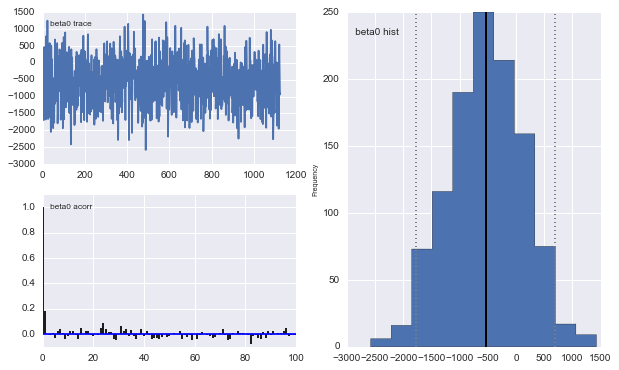

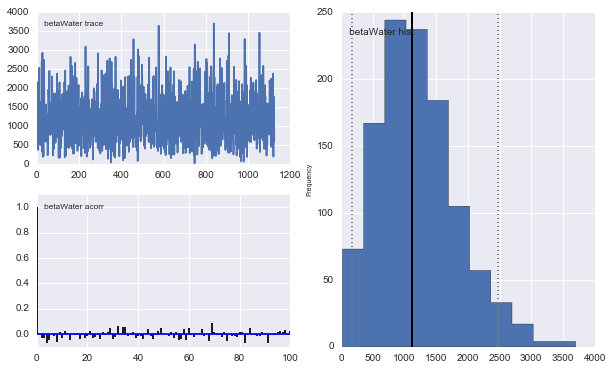

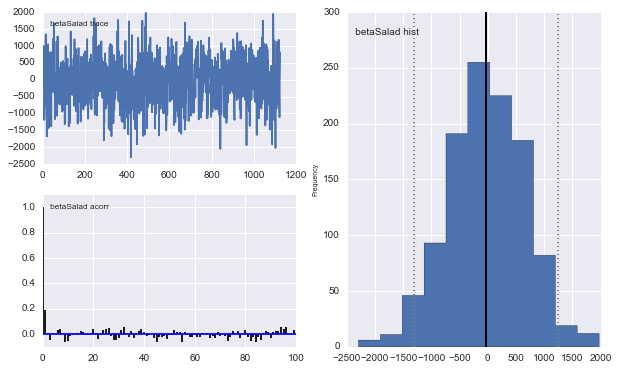

In [28]:
pm.Matplot.plot(m)


In [29]:
pm.g

<module 'pymc' from '/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/pymc/__init__.py'>